In [50]:
import os
import re
import scipy
from scipy import stats
import pickle
import subprocess
import shlex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train_df = pd.read_excel('Timestep5_train.xlsx')
test_df = pd.read_excel('Timestep5_test.xlsx')
holdout_df = pd.read_excel('Timestep5_holdout.xlsx')

In [31]:
print(train_df.shape)
print(test_df.shape)
print(holdout_df.shape)

(71445, 70)
(20415, 70)
(10210, 70)


In [32]:
def get_time_step(df, id_list, steps):
    result_df = pd.DataFrame()
    for id in id_list:
        id_df = df[df['id'] == id]
        if id_df.shape[0] >= steps:
            id_df = id_df.sort_values(by='hour', ascending=False)
            counter = 0
            for index, row in id_df.iterrows():
                if counter < steps:
                    row_dict = row.to_dict()
                    result_df = result_df.append(row_dict, ignore_index=True)
                    counter += 1
        else:
            id_df = id_df.sort_values(by='hour', ascending=False)
            n = steps - id_df.shape[0]
            for index, row in id_df.iterrows():
                row_dict = row.to_dict()
                result_df = result_df.append(row_dict, ignore_index=True)
            for i in range(n):
                result_df = result_df.append(row_dict, ignore_index=True)
            
    return result_df

In [17]:
# holdout_df = get_time_step(merged_holdout_df, holdout_id_list, 5)

In [18]:
# # Converting los_icu into 3 categorical bins

# low_thres = 2.5
# medium_thres = 5

# result_df['icu_cat'] = 10
# result_df.loc[result_df['los_icu'] < low_thres, 'icu_cat'] = 0
# result_df.loc[((result_df['los_icu'] >= low_thres) & (result_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# result_df.loc[result_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

# test_df['icu_cat'] = 10
# test_df.loc[test_df['los_icu'] < low_thres, 'icu_cat'] = 0
# test_df.loc[((test_df['los_icu'] >= low_thres) & (test_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# test_df.loc[test_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

# holdout_df['icu_cat'] = 10
# holdout_df.loc[holdout_df['los_icu'] < low_thres, 'icu_cat'] = 0
# holdout_df.loc[((holdout_df['los_icu'] >= low_thres) & (holdout_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# holdout_df.loc[holdout_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

In [33]:
def get_time_step(df, id_list, steps):
    result_df = pd.DataFrame()
    for id in id_list:
        id_df = df[df['id'] == id]
        if id_df.shape[0] >= steps:
            id_df = id_df.sort_values(by='hour', ascending=False)
            counter = 0
            for index, row in id_df.iterrows():
                if counter < steps:
                    row_dict = row.to_dict()
                    result_df = result_df.append(row_dict, ignore_index=True)
                    counter += 1
        else:
            id_df = id_df.sort_values(by='hour', ascending=False)
            n = steps - id_df.shape[0]
            for index, row in id_df.iterrows():
                row_dict = row.to_dict()
                result_df = result_df.append(row_dict, ignore_index=True)
            for i in range(n):
                result_df = result_df.append(row_dict, ignore_index=True)
            
    return result_df

In [34]:
# holdout_df = get_time_step(merged_holdout_df, holdout_id_list, 5)

In [35]:
train_df.head()

,id,charttime,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,...,first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),hour,icu_cat
0,20001305,1978-03-25 08:20:00,15,23.0,47,11.4,108,0.8,154,142,...,0,0,1,0,0,0,0,0,5.350000,1
1,20001305,1978-03-25 08:20:00,15,23.0,47,11.4,108,0.8,154,142,...,0,0,1,0,0,0,0,0,5.350000,1
2,20001305,1978-03-25 08:20:00,15,23.0,47,11.4,108,0.8,154,142,...,0,0,1,0,0,0,0,0,5.350000,1
3,20001305,1978-03-25 13:45:00,13,25.0,48,10.8,107,0.9,149,140,...,0,0,1,0,0,0,0,0,10.766667,1
4,20001305,1978-03-25 21:55:00,13,24.0,50,10.8,108,0.9,131,141,...,0,0,1,0,0,0,0,0,18.933333,1


In [36]:
train_df.columns.tolist()

['id',
 'charttime',
 'aniongap',
 'bicarbonate',
 'bun',
 'calcium',
 'chloride',
 'creatinine',
 'glucose',
 'sodium',
 'potassium',
 'hematocrit',
 'hemoglobin',
 'mch',
 'mchc',
 'mcv',
 'platelet',
 'rbc',
 'rdw',
 'wbc',
 'inr',
 'pt',
 'ptt',
 'hosp_admittime',
 'hosp_dischtime',
 'icu_intime',
 'icu_outtime',
 'los_icu',
 'icu_death',
 'gender',
 'race',
 'admission_age',
 'weight_admit',
 'height',
 'charlson_score',
 'atrial_fibrillation',
 'malignant_cancer',
 'chf',
 'ckd',
 'cld',
 'copd',
 'diabetes',
 'hypertension',
 'ihd',
 'stroke',
 'race_encode_African',
 'race_encode_Asian',
 'race_encode_Caucasian',
 'race_encode_Hispanic',
 'race_encode_Not Specified',
 'race_encode_South American',
 'admission_type_DIRECT EMER.',
 'admission_type_DIRECT OBSERVATION',
 'admission_type_ELECTIVE',
 'admission_type_EU OBSERVATION',
 'admission_type_EW EMER.',
 'admission_type_OBSERVATION ADMIT',
 'admission_type_SURGICAL SAME DAY ADMISSION',
 'admission_type_URGENT',
 'first_careuni

In [37]:
test_df.dtypes

id                                                                  int64
charttime                                                          object
aniongap                                                            int64
bicarbonate                                                       float64
bun                                                                 int64
                                                                   ...   
first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)      int64
first_careunit_Surgical Intensive Care Unit (SICU)                  int64
first_careunit_Trauma SICU (TSICU)                                  int64
hour                                                              float64
icu_cat                                                             int64
Length: 70, dtype: object

In [38]:
columns_to_drop = ['id',
                   'charttime',
                   'hour',
                   'icu_cat',
                   'hosp_admittime',
                   'hosp_dischtime',
                   'icu_intime',
                   'icu_outtime',
                   'los_icu',
                   'icu_death',
                   'race'
                  ]

X_train_df = train_df.drop(columns=columns_to_drop)
X_test_df = test_df.drop(columns=columns_to_drop)
X_holdout_df = holdout_df.drop(columns=columns_to_drop)

print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(71445, 59)
(20415, 59)
(10210, 59)


In [39]:
X_train_df.dtypes

aniongap                                                             int64
bicarbonate                                                        float64
bun                                                                  int64
calcium                                                            float64
chloride                                                             int64
creatinine                                                         float64
glucose                                                              int64
sodium                                                               int64
potassium                                                          float64
hematocrit                                                         float64
hemoglobin                                                         float64
mch                                                                float64
mchc                                                               float64
mcv                      

In [40]:
# Perform normalization using data from X_train to transform X_test, X_holdout

from sklearn.preprocessing import StandardScaler

num_cols = X_train_df.columns[X_train_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler = StandardScaler()
X_train_df[num_cols] = scaler.fit_transform(X_train_df[num_cols])
X_test_df[num_cols] = scaler.transform(X_test_df[num_cols])
X_holdout_df[num_cols] = scaler.transform(X_holdout_df[num_cols])

In [41]:
X_holdout_df.describe()

,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,...,admission_type_URGENT,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Neuro Intermediate,first_careunit_Neuro Stepdown,first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU)
count,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,...,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000
mean,-0.034285,0.003143,-0.022060,-0.023968,-0.013462,0.002053,-0.001639,-0.037537,-0.014542,-0.011621,...,-0.011461,0.029714,-0.010217,-0.015107,0.013644,0.010935,-0.036203,-0.017820,0.012166,-0.017278
std,0.982303,0.991229,0.971259,0.976816,0.995206,0.980604,0.965954,0.965095,0.983992,0.978542,...,0.990376,1.034467,0.988041,0.991868,1.010491,1.063012,0.577845,0.939553,1.011773,0.979637
min,-4.148475,-3.511353,-1.257441,-7.334448,-5.686783,-0.890567,-1.815757,-5.962329,-3.688452,-3.349954,...,-0.468075,-0.363662,-0.370780,-0.600822,-0.489721,-0.083527,-0.054295,-0.148916,-0.421541,-0.371391
25%,-0.546588,-0.600528,-0.687793,-0.549026,-0.575844,-0.546173,-0.548309,-0.580979,-0.650235,-0.592042,...,-0.468075,-0.363662,-0.370780,-0.600822,-0.489721,-0.083527,-0.054295,-0.148916,-0.421541,-0.371391
50%,-0.096352,-0.018363,-0.260556,0.056815,0.008264,-0.300177,-0.262111,-0.024287,-0.121850,-0.251559,...,-0.468075,-0.363662,-0.370780,-0.600822,-0.489721,-0.083527,-0.054295,-0.148916,-0.421541,-0.371391
75%,0.353884,0.563802,0.288748,0.420320,0.592371,0.093416,0.255771,0.532404,0.505608,0.565600,...,-0.468075,-0.363662,-0.370780,1.664387,-0.489721,-0.083527,-0.054295,-0.148916,-0.421541,-0.371391
max,8.233011,5.027067,6.676951,14.354667,4.681122,14.951563,17.850131,6.099319,7.539740,4.651395,...,2.136411,2.749803,2.697014,1.664387,2.041980,11.972190,18.417771,6.715173,2.372246,2.692582


In [ ]:
# # Converting los_icu into 3 categorical bins

# low_thres = 2.5
# medium_thres = 5

# result_df['icu_cat'] = 10
# result_df.loc[result_df['los_icu'] < low_thres, 'icu_cat'] = 0
# result_df.loc[((result_df['los_icu'] >= low_thres) & (result_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# result_df.loc[result_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

# test_df['icu_cat'] = 10
# test_df.loc[test_df['los_icu'] < low_thres, 'icu_cat'] = 0
# test_df.loc[((test_df['los_icu'] >= low_thres) & (test_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# test_df.loc[test_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

# holdout_df['icu_cat'] = 10
# holdout_df.loc[holdout_df['los_icu'] < low_thres, 'icu_cat'] = 0
# holdout_df.loc[((holdout_df['los_icu'] >= low_thres) & (holdout_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
# holdout_df.loc[holdout_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

In [22]:
# # sorting hours to ascending order

# result_df = result_df.sort_values(by=['id', 'hour'], ascending=[True, True])
# test_df = test_df.sort_values(by=['id', 'hour'], ascending=[True, True])
# holdout_df = holdout_df.sort_values(by=['id', 'hour'], ascending=[True, True])

# result_df.reset_index(drop=True, inplace=True)
# test_df.reset_index(drop=True, inplace=True)
# holdout_df.reset_index(drop=True, inplace=True)

# test_df.head(20)

In [42]:
# transforming X data into LSTM input format of [num_samples, time_step, num_features]


steps = 5

numpy_train_data = X_train_df.values
numpy_test_data = X_test_df.values
numpy_holdout_data = X_holdout_df.values

# print(len(numpy_data))
X_train_input = []
y_train = []
X_test_input = []
y_test = []
X_holdout_input = []
y_holdout = []


for i in range(int(len(numpy_train_data)/steps)):
    sample = X_train_df.iloc[i*steps:i*steps+steps]
    label = train_df.iloc[i*steps][-1]
    X_train_input.append(sample)
    y_train.append(label)

for i in range(int(len(numpy_test_data)/steps)):
    sample = X_test_df.iloc[i*steps:i*steps+steps]
    label = test_df.iloc[i*steps][-1]
    X_test_input.append(sample)
    y_test.append(label)

for i in range(int(len(numpy_holdout_data)/steps)):
    sample = X_holdout_df.iloc[i*steps:i*steps+steps]
    label = holdout_df.iloc[i*steps][-1]
    X_holdout_input.append(sample)
    y_holdout.append(label)

X_train_input = np.array(X_train_input)
y_train = np.array(y_train)

X_test_input = np.array(X_test_input)
y_test = np.array(y_test)

X_holdout_input = np.array(X_holdout_input)
y_holdout = np.array(y_holdout)

In [43]:
print(X_train_input.shape)
print(X_test_input.shape)
print(X_holdout_input.shape)

(14289, 5, 59)
(4083, 5, 59)
(2042, 5, 59)


In [44]:
# converting into transformer input format of [time_step, num_samples, num_features]

X_train_trans = np.transpose(X_train_input, (1, 0, 2))
X_test_trans = np.transpose(X_test_input, (1, 0, 2))
X_holdout_trans = np.transpose(X_holdout_input, (1, 0, 2))

print(X_train_trans.shape)
print(X_test_trans.shape)
print(X_holdout_trans.shape)

(5, 14289, 59)
(5, 4083, 59)
(5, 2042, 59)


In [72]:
y_train.shape
X_train_trans.shape

torch.Size([5, 14289, 59])

In [45]:
# X_train_input.dtypes

In [46]:
print(X_train_input[:10])
print(y_train[0:10])

[[[-0.09635218 -0.01836304  0.57357206 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.09635218 -0.01836304  0.57357206 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.09635218 -0.01836304  0.57357206 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.54658805  0.36974698  0.61426125 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.54658805  0.17569197  0.69563963 ... -0.14891649 -0.42154144
   -0.37139068]]

 [[-0.32147012 -0.21241805 -0.19952254 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.09635218 -0.60052807 -0.03676578 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.09635218 -0.01836304  0.12599098 ... -0.14891649 -0.42154144
   -0.37139068]
  [-0.09635218 -0.01836304 -0.24021173 ... -0.14891649 -0.42154144
   -0.37139068]
  [ 0.57900163 -0.01836304  0.28874774 ... -0.14891649 -0.42154144
   -0.37139068]]

 [[ 0.12876576 -0.21241805 -0.80986039 ...  6.715173   -0.42154144
   -0.37139068]
  [ 0.12876576 -0.21241805 -0.80986039 ...  6.715173   -0.42154144
   -0.37139068]


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

In [48]:
# Example sequential measurement data
# Assuming each sequence has 5 time steps and 59 features
# X = np.random.randn(14289, 5, 59)
X_train = torch.tensor(X_train_input, dtype=torch.float32)
X_test = torch.tensor(X_test_input, dtype=torch.float32)
X_holdout = torch.tensor(X_holdout_input, dtype=torch.float32)

# Example classification labels
# y = np.random.randint(0, 3, 14289)  # Assuming three classes
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_holdout = torch.tensor(y_holdout, dtype=torch.long)

# Define LSTM model for classification
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.0):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # Defining dropout layer with specified dropout rate
        self.dropout = nn.Dropout(dropout_rate)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        
        # Applying dropout
        out = self.dropout(out)
        
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the classification model
input_size = 59  # Number of features in each time step
hidden_size = 100  # Number of LSTM units
num_layers = 4  # Number of LSTM layers
num_classes = 3  # Number of output classes
dropout_rate = 0.3  # Example dropout rate
classification_model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes, dropout_rate)
# classification_model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classification_model.parameters(), lr=0.001)

# Train the classification model
num_epochs = 200
for epoch in range(num_epochs):
    classification_model.train()
    optimizer.zero_grad()
    outputs = classification_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/200], Loss: 1.0822
Epoch [2/200], Loss: 1.0797
Epoch [3/200], Loss: 1.0778
Epoch [4/200], Loss: 1.0761
Epoch [5/200], Loss: 1.0749
Epoch [6/200], Loss: 1.0740
Epoch [7/200], Loss: 1.0734
Epoch [8/200], Loss: 1.0735
Epoch [9/200], Loss: 1.0733
Epoch [10/200], Loss: 1.0721
Epoch [11/200], Loss: 1.0710
Epoch [12/200], Loss: 1.0690
Epoch [13/200], Loss: 1.0670
Epoch [14/200], Loss: 1.0641
Epoch [15/200], Loss: 1.0615
Epoch [16/200], Loss: 1.0588
Epoch [17/200], Loss: 1.0555
Epoch [18/200], Loss: 1.0531
Epoch [19/200], Loss: 1.0513
Epoch [20/200], Loss: 1.0498
Epoch [21/200], Loss: 1.0482
Epoch [22/200], Loss: 1.0460
Epoch [23/200], Loss: 1.0448
Epoch [24/200], Loss: 1.0440
Epoch [25/200], Loss: 1.0426
Epoch [26/200], Loss: 1.0410
Epoch [27/200], Loss: 1.0384
Epoch [28/200], Loss: 1.0368
Epoch [29/200], Loss: 1.0350
Epoch [30/200], Loss: 1.0341
Epoch [31/200], Loss: 1.0319
Epoch [32/200], Loss: 1.0303
Epoch [33/200], Loss: 1.0289
Epoch [34/200], Loss: 1.0275
Epoch [35/200], Loss: 1

In [54]:
from sklearn.metrics import classification_report

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_train)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Print classification report
print(classification_report(y_train.numpy(), predicted))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6248
           1       0.82      0.63      0.71      4198
           2       0.74      0.93      0.83      3843

    accuracy                           0.81     14289
   macro avg       0.81      0.81      0.80     14289
weighted avg       0.82      0.81      0.81     14289



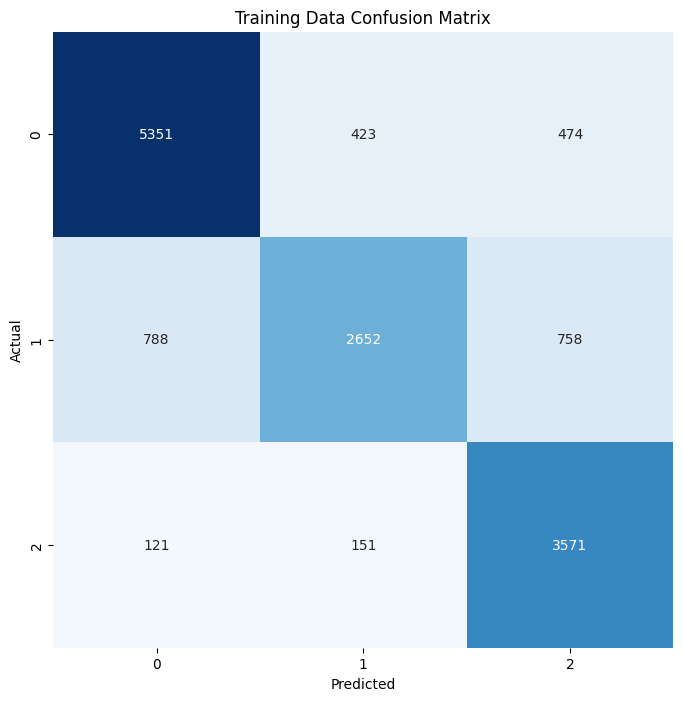

In [55]:
from sklearn.metrics import confusion_matrix

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_train)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# # Compute confusion matrix
# cm = confusion_matrix(y_train.numpy(), predicted)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

cm = confusion_matrix(y_train.numpy(), predicted)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Data Confusion Matrix")
plt.show()

In [56]:
from sklearn.metrics import classification_report

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Print classification report
print(classification_report(y_test.numpy(), predicted))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1794
           1       0.29      0.24      0.27      1150
           2       0.40      0.47      0.43      1139

    accuracy                           0.43      4083
   macro avg       0.41      0.41      0.41      4083
weighted avg       0.42      0.43      0.42      4083



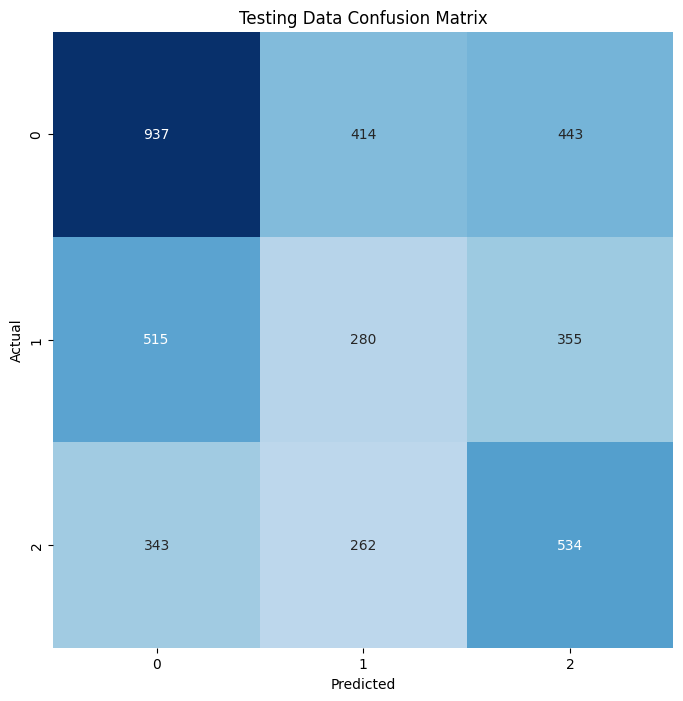

In [57]:
# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# # Compute confusion matrix
# cm = confusion_matrix(y_train.numpy(), predicted)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

cm = confusion_matrix(y_test.numpy(), predicted)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Testing Data Confusion Matrix")
plt.show()

# Attempting Transformer Classifier

In [68]:
X_train_trans = torch.tensor(X_train_trans, dtype=torch.float32)
X_test_trans = torch.tensor(X_test_trans, dtype=torch.float32)
X_holdout_trans = torch.tensor(X_holdout_trans, dtype=torch.float32)


In [89]:
X_train_trans.shape

torch.Size([5, 14289, 59])

In [90]:
y_train.shape

torch.Size([14289])

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Transformer model
class TransformerClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.Transformer(d_model=input_size, nhead=4, num_encoder_layers=num_layers)
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, src, tgt=None):
        # src: [seq_length, batch_size, input_size]
        # tgt: [seq_length, batch_size, input_size] (optional)
        transformer_output = self.transformer(src, tgt)
        if isinstance(transformer_output, tuple):  # If tuple, extract the output tensor
            transformer_output = transformer_output[0]
        last_output = transformer_output[-1, :, :]
        output = self.fc(last_output)
        return output
    # def forward(self, src, tgt=None):
    #     # src: [seq_length, batch_size, input_size]
    #     # tgt: [seq_length, batch_size, input_size] (optional)
    #     transformer_output = self.transformer(src, tgt)
    #     last_output = transformer_output[-1, :, :]
    #     output = self.fc(last_output)
    #     return output
    # def forward(self, x):
    #     # x: [seq_length, batch_size, input_size]
    #     transformer_output = self.transformer(x)
    #     # Take only the output of the last time step
    #     last_output = transformer_output[-1, :, :]
    #     # Feed the output of the last time step to the final linear layer
    #     output = self.fc(last_output)
    #     return output

# Example usage
# Define hyperparameters
input_size = 60  # Number of features
seq_length = 5  # Length of each sequence
hidden_size = 64  # Hidden size of the transformer
num_layers = 4  # Number of transformer layers
num_classes = 3  # Number of output classes

# Create an instance of the model
model = TransformerClassifier(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy input data (replace with your actual data)
# X_train = torch.randn(seq_length, 32, input_size)
# y_train = torch.randint(0, num_classes, (32,))

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_trans)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, you can use the model for inference
# For example:
# X_test = torch.randn(seq_length, 10, input_size)
# outputs = model(X_test)
# predicted_labels = torch.argmax(outputs, dim=1)

AttributeError: 'NoneType' object has no attribute 'size'

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate=0.1):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.pos_encoding = self.positional_encoding(input_size, hidden_size)
        self.transformer = nn.Transformer(d_model=hidden_size, nhead=num_heads, num_encoder_layers=num_layers)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, inputs):
        seq_len = inputs.size(0)
        batch_size = inputs.size(1)
        
        # Add embedding and positional encoding
        x = self.embedding(inputs)
        x = x + self.pos_encoding[:seq_len, :].unsqueeze(1)
        
        # Transformer encoder
        x = self.dropout(x)
        transformer_output = self.transformer(x)
        
        # Take only the output of the last time step
        last_output = transformer_output[-1, :, :]
        
        # Feed the output of the last time step to the final linear layer
        output = self.fc(last_output)
        return output

    def positional_encoding(self, input_size, hidden_size):
        position = torch.arange(input_size, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, hidden_size, 2).float() * (-torch.log(torch.tensor(10000.0)) / hidden_size))
        pe = torch.zeros(input_size, hidden_size)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe

# Define hyperparameters
input_size = 1000  # Vocabulary size
hidden_size = 128
num_layers = 4
num_heads = 8
num_classes = 10
dropout_rate = 0.1

# Create an instance of the model
model = TransformerClassifier(input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert X_train_trans and y_train to PyTorch tensors if not already
X_train_trans_try = torch.tensor(X_train_trans)
y_train_try = torch.tensor(y_train)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_trans_try)
    loss = criterion(outputs, y_train_try)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

C:\Users\ngqin\AppData\Local\Temp\ipykernel_17144\3752788572.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_trans_try = torch.tensor(X_train_trans)
C:\Users\ngqin\AppData\Local\Temp\ipykernel_17144\3752788572.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_try = torch.tensor(y_train)


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate=0.1):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.pos_encoding = self.positional_encoding(input_size, hidden_size)
        self.transformer = nn.Transformer(d_model=hidden_size, nhead=num_heads, num_encoder_layers=num_layers)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, inputs):
        seq_len = inputs.size(0)
        batch_size = inputs.size(1)
        
        # Add embedding and positional encoding
        x = self.embedding(inputs)
        x = x + self.pos_encoding[:seq_len, :].unsqueeze(1)
        
        # Transformer encoder
        x = self.dropout(x)
        transformer_output = self.transformer(x)
        
        # Take only the output of the last time step
        last_output = transformer_output[-1, :, :]
        
        # Feed the output of the last time step to the final linear layer
        output = self.fc(last_output)
        return output

    def positional_encoding(self, input_size, hidden_size):
        position = torch.arange(input_size, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, hidden_size, 2).float() * (-torch.log(torch.tensor(10000.0)) / hidden_size))
        pe = torch.zeros(input_size, hidden_size)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe

# Instantiate the Transformer classifier model
input_size = 59  # Number of features in each time step
hidden_size = 100  # Hidden size of the transformer
num_layers = 4  # Number of transformer layers
num_heads = 4  # Number of attention heads
num_classes = 3  # Number of output classes
dropout_rate = 0.3  # Example dropout rate
transformer_model = TransformerClassifier(input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)

# Train the Transformer classifier model
num_epochs = 200
for epoch in range(num_epochs):
    transformer_model.train()
    optimizer.zero_grad()
    outputs = transformer_model(X_train_trans.long())  # Convert X_train to integer type
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

IndexError: index out of range in self

In [87]:
class TransformerClassifier(nn.Module):
  def __init__(self, d_model, nhead, num_layers, dropout=0.1):
    super(TransformerClassifier, self).__init__()
    self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=dropout), num_layers)
    self.linear = nn.Linear(d_model, 3)

  def forward(self, x):
    # No embedding layer, directly feed the input to the transformer
    # x = x.permute(1, 0, 2)  # [batch_size, seq_len, feature_dim] -> (seq_len, batch_size, feature_dim)

    # Pass the input through the transformer
    x = self.transformer(x)

    # Extract the final hidden representation for each token (last layer, output token)
    pooled_output = x[:, -1, :]  # [seq_len, d_model] -> [batch_size, d_model]

    # Classify using a linear layer
    logits = self.linear(pooled_output)
    predictions = F.log_softmax(logits, dim=1)  # [batch_size, num_classes]

    return predictions

# # Example usage (assuming your input x has shape [batch_size, seq_len, feature_dim])
# model = TransformerClassifier(d_model=256, nhead=4, num_layers=2)
# output = model(x)

import torch

# Sample data (replace with your actual data)
batch_size = 14289
seq_len = 5
feature_dim = 78  # Assuming your features have dimension 78

# x = torch.randn(batch_size, seq_len, feature_dim)  # Random input data

# Define model hyperparameters
vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 128
d_model = 256
nhead = 4
num_layers = 2

# Create the model instance
model = TransformerClassifier(vocab_size, embedding_dim, d_model, nhead, num_layers)

# Define loss function and optimizer (replace with your choices if needed)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())  # Adjust optimizer hyperparameters if needed

# Train the model for 200 epochs
num_epochs = 200
for epoch in range(num_epochs):
  # Forward pass
  output = model(X_train_trans)

  # Generate random labels for demonstration (replace with your actual labels)
  # labels = y_train

  # Calculate loss
  loss = criterion(output, y_train)

  # Backward pass and update weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Print training progress (optional)
  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

TypeError: TransformerClassifier.__init__() takes from 4 to 5 positional arguments but 6 were given

In [88]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

class TransformerClassifier(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=dropout), num_layers)
        self.linear = nn.Linear(d_model, 3)

    def forward(self, x):
        # ... (same forward method as before)

    def train_epoch(self, optimizer, criterion, X_train_trans, y_train, device, batch_size=32):
        self.train()  # Set the model to training mode
        total_loss = 0

        # Create a temporary DataLoader from the training data
        train_dataset = TensorDataset(X_train_trans, y_train)
        train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        for batch_idx, (data, target) in enumerate(train_data_loader):
          # ... (same training loop logic as before)

        return total_loss / len(train_data_loader)

# Example usage
model = TransformerClassifier(d_model=256, nhead=4, num_layers=2)
optimizer = Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y_train = # Assuming you have your training labels (shape [batch_size])

# Train for 10 epochs
for epoch in range(10):
  loss = model.train_epoch(optimizer, criterion, X_train_trans, y_train, device)
  print(f'Average training loss: {loss:.6f}')

IndentationError: expected an indented block after function definition on line 12 (1559865555.py, line 15)

In [98]:
X_train_trans_new = torch.zeros((5, 14289, 60))
X_train_trans_new[:, :, :59] = X_train_trans

X_test_trans_new = torch.zeros((5, 4083, 60))
X_test_trans_new[:, :, :59] = X_test_trans

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate=0.1):
        super(TransformerClassifier, self).__init__()
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads), num_layers)
        self.fc = nn.Linear(input_size, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # x: [seq_length, batch_size, input_size]
        transformer_output = self.transformer(x)
        # Take only the output of the last time step
        last_output = transformer_output[-1, :, :]
        # Feed the output of the last time step to the final linear layer
        output = self.fc(last_output)
        return output

# Instantiate the Transformer classifier model
input_size = 60  # Number of features in each time step
hidden_size = 100  # Hidden size of the transformer
num_layers = 4  # Number of transformer layers
num_heads = 4  # Number of attention heads
num_classes = 3  # Number of output classes
dropout_rate = 0.0  # Example dropout rate
transformer_model = TransformerClassifier(input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=0.003)

# Train the Transformer classifier model
num_epochs = 100
for epoch in range(num_epochs):
    transformer_model.train()
    optimizer.zero_grad()
    outputs = transformer_model(X_train_trans_new)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Loss: 1.1515
Epoch [2/100], Loss: 1.1119
Epoch [3/100], Loss: 1.7659
Epoch [4/100], Loss: 1.1689
Epoch [5/100], Loss: 1.1292
Epoch [6/100], Loss: 1.1623
Epoch [7/100], Loss: 1.1076
Epoch [8/100], Loss: 1.0792
Epoch [9/100], Loss: 1.0876
Epoch [10/100], Loss: 1.0958
Epoch [11/100], Loss: 1.0935
Epoch [12/100], Loss: 1.0855
Epoch [13/100], Loss: 1.0787
Epoch [14/100], Loss: 1.0775
Epoch [15/100], Loss: 1.0790
Epoch [16/100], Loss: 1.0819
Epoch [17/100], Loss: 1.0833
Epoch [18/100], Loss: 1.0837
Epoch [19/100], Loss: 1.0810
Epoch [20/100], Loss: 1.0805
Epoch [21/100], Loss: 1.0783
Epoch [22/100], Loss: 1.0770
Epoch [23/100], Loss: 1.0768
Epoch [24/100], Loss: 1.0791
Epoch [25/100], Loss: 1.0785
Epoch [26/100], Loss: 1.0798
Epoch [27/100], Loss: 1.0796
Epoch [28/100], Loss: 1.0796
Epoch [29/100], Loss: 1.0791
Epoch [30/100], Loss: 1.0766
Epoch [31/100], Loss: 1.0774
Epoch [32/100], Loss: 1.0766
Epoch [33/100], Loss: 1.0774
Epoch [34/100], Loss: 1.0770
Epoch [35/100], Loss: 1

KeyboardInterrupt: 

In [103]:
from sklearn.metrics import classification_report

# Evaluate the classification model
transformer_model.eval()
with torch.no_grad():
    outputs = transformer_model(X_test_trans_new)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Print classification report
print(classification_report(y_test.numpy(), predicted))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61      1794
           1       0.00      0.00      0.00      1150
           2       0.00      0.00      0.00      1139

    accuracy                           0.44      4083
   macro avg       0.15      0.33      0.20      4083
weighted avg       0.19      0.44      0.27      4083



C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [108]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class TransformerClassifier(Model):
    def __init__(self, input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate=0.1):
        super(TransformerClassifier, self).__init__()
        self.attention_layers = [layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size) for _ in range(num_layers)]
        self.dropout_layers = [layers.Dropout(rate=dropout_rate) for _ in range(num_layers)]
        self.normalization_layers = [layers.LayerNormalization(epsilon=1e-6) for _ in range(num_layers)]
        self.feedforward_layers = [layers.Dense(units=hidden_size*4, activation='relu') for _ in range(num_layers)]
        self.fc = layers.Dense(num_classes)
        self.flatten = layers.Flatten()

    def call(self, x):
        for i in range(len(self.attention_layers)):
            # Multi-head self-attention
            attention_output = self.attention_layers[i](x, x)
            # Apply dropout
            attention_output = self.dropout_layers[i](attention_output)
            # Add and normalize
            x = self.normalization_layers[i](x + attention_output)
            # Feedforward network
            feedforward_output = self.feedforward_layers[i](x)
            # Apply dropout
            feedforward_output = self.dropout_layers[i](feedforward_output)
            # Add and normalize
            x = self.normalization_layers[i](x + feedforward_output)
        # Take only the output of the last time step
        last_output = x[:, -1, :]
        # Feed the output of the last time step to the final dense layer
        output = self.fc(last_output)
        return output

# Instantiate the Transformer classifier model
input_size = 59  # Number of features in each time step
hidden_size = 100  # Hidden size of the transformer
num_layers = 4  # Number of transformer layers
num_heads = 4  # Number of attention heads
num_classes = 3  # Number of output classes
dropout_rate = 0.3  # Example dropout rate
transformer_model = TransformerClassifier(input_size, hidden_size, num_layers, num_heads, num_classes, dropout_rate)

# Define loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

# Compile the model
transformer_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the Transformer classifier model
num_epochs = 100
transformer_model.fit(X_train, y_train, epochs=num_epochs)

Epoch 1/100


ValueError: Exception encountered when calling TransformerClassifier.call().

[1mDimensions must be equal, but are 59 and 400 for '{{node transformer_classifier_4_1/add_1}} = AddV2[T=DT_FLOAT](transformer_classifier_4_1/layer_normalization_12_1/add_2, transformer_classifier_4_1/dense_15_1/Relu)' with input shapes: [?,5,59], [?,5,400].[0m

Arguments received by TransformerClassifier.call():
  • x=tf.Tensor(shape=(None, 5, 59), dtype=float32)

In [75]:
# Example sequential measurement data
# Assuming each sequence has 5 time steps and 59 features
# X = np.random.randn(14289, 5, 59)
X_train = torch.tensor(X_train_input, dtype=torch.float32)
X_test = torch.tensor(X_test_input, dtype=torch.float32)

# Example classification labels
# y = np.random.randint(0, 3, 14289)  # Assuming three classes
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define LSTM model for classification
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the classification model
input_size = 59  # Number of features in each time step
hidden_size = 50  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
num_classes = 3  # Number of output classes
classification_model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classification_model.parameters(), lr=0.001)

# Train the classification model
num_epochs = 300
for epoch in range(num_epochs):
    classification_model.train()
    optimizer.zero_grad()
    outputs = classification_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/300], Loss: 1.1235
Epoch [2/300], Loss: 1.1199
Epoch [3/300], Loss: 1.1164
Epoch [4/300], Loss: 1.1131
Epoch [5/300], Loss: 1.1098
Epoch [6/300], Loss: 1.1067
Epoch [7/300], Loss: 1.1036
Epoch [8/300], Loss: 1.1005
Epoch [9/300], Loss: 1.0975
Epoch [10/300], Loss: 1.0944
Epoch [11/300], Loss: 1.0913
Epoch [12/300], Loss: 1.0882
Epoch [13/300], Loss: 1.0850
Epoch [14/300], Loss: 1.0818
Epoch [15/300], Loss: 1.0786
Epoch [16/300], Loss: 1.0753
Epoch [17/300], Loss: 1.0720
Epoch [18/300], Loss: 1.0688
Epoch [19/300], Loss: 1.0657
Epoch [20/300], Loss: 1.0629
Epoch [21/300], Loss: 1.0603
Epoch [22/300], Loss: 1.0581
Epoch [23/300], Loss: 1.0565
Epoch [24/300], Loss: 1.0553
Epoch [25/300], Loss: 1.0546
Epoch [26/300], Loss: 1.0540
Epoch [27/300], Loss: 1.0532
Epoch [28/300], Loss: 1.0522
Epoch [29/300], Loss: 1.0507
Epoch [30/300], Loss: 1.0489
Epoch [31/300], Loss: 1.0470
Epoch [32/300], Loss: 1.0451
Epoch [33/300], Loss: 1.0434
Epoch [34/300], Loss: 1.0418
Epoch [35/300], Loss: 1

C:\Users\ngqin\AppData\Local\Temp\ipykernel_16240\1965860993.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
C:\Users\ngqin\AppData\Local\Temp\ipykernel_16240\1965860993.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Epoch [1/200], Loss: 1.1044
Epoch [2/200], Loss: 1.1021
Epoch [3/200], Loss: 1.0995
Epoch [4/200], Loss: 1.0975
Epoch [5/200], Loss: 1.0949
Epoch [6/200], Loss: 1.0929
Epoch [7/200], Loss: 1.0905
Epoch [8/200], Loss: 1.0886
Epoch [9/200], Loss: 1.0867
Epoch [10/200], Loss: 1.0839
Epoch [11/200], Loss: 1.0829
Epoch [12/200], Loss: 1.0802
Epoch [13/200], Loss: 1.0785
Epoch [14/200], Loss: 1.0769
Epoch [15/200], Loss: 1.0750
Epoch [16/200], Loss: 1.0737
Epoch [17/200], Loss: 1.0733
Epoch [18/200], Loss: 1.0723
Epoch [19/200], Loss: 1.0731
Epoch [20/200], Loss: 1.0735
Epoch [21/200], Loss: 1.0731
Epoch [22/200], Loss: 1.0722
Epoch [23/200], Loss: 1.0701
Epoch [24/200], Loss: 1.0685
Epoch [25/200], Loss: 1.0662
Epoch [26/200], Loss: 1.0650
Epoch [27/200], Loss: 1.0643
Epoch [28/200], Loss: 1.0629
Epoch [29/200], Loss: 1.0608
Epoch [30/200], Loss: 1.0591
Epoch [31/200], Loss: 1.0574
Epoch [32/200], Loss: 1.0570
Epoch [33/200], Loss: 1.0542
Epoch [34/200], Loss: 1.0530
Epoch [35/200], Loss: 1

In [94]:
from sklearn.metrics import confusion_matrix

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[858 355 581]
 [451 252 447]
 [326 202 611]]


In [96]:
from sklearn.metrics import confusion_matrix

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_train)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Compute confusion matrix
cm = confusion_matrix(y_train.numpy(), predicted)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4664  674  910]
 [ 770 2176 1252]
 [  76  319 3448]]


In [97]:
# Define RNN model for classification
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.0):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        
        # Defining dropout layer with specified dropout rate
        self.dropout = nn.Dropout(dropout_rate)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        
        # Applying dropout
        out = self.dropout(out)
        
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the classification model
input_size = 59  # Number of features in each time step
hidden_size = 50  # Number of RNN units
num_layers = 4  # Number of RNN layers
num_classes = 3  # Number of output classes
dropout_rate = 0.5  # Example dropout rate
classification_model = RNNClassifier(input_size, hidden_size, num_layers, num_classes, dropout_rate)
# classification_model = RNNClassifier(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classification_model.parameters(), lr=0.001)

# Train the classification model
num_epochs = 200
for epoch in range(num_epochs):
    classification_model.train()
    optimizer.zero_grad()
    outputs = classification_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/200], Loss: 1.1140
Epoch [2/200], Loss: 1.0965
Epoch [3/200], Loss: 1.0841
Epoch [4/200], Loss: 1.0766
Epoch [5/200], Loss: 1.0736
Epoch [6/200], Loss: 1.0737
Epoch [7/200], Loss: 1.0729
Epoch [8/200], Loss: 1.0702
Epoch [9/200], Loss: 1.0673
Epoch [10/200], Loss: 1.0645
Epoch [11/200], Loss: 1.0623
Epoch [12/200], Loss: 1.0595
Epoch [13/200], Loss: 1.0573
Epoch [14/200], Loss: 1.0583
Epoch [15/200], Loss: 1.0556
Epoch [16/200], Loss: 1.0535
Epoch [17/200], Loss: 1.0536
Epoch [18/200], Loss: 1.0509
Epoch [19/200], Loss: 1.0521
Epoch [20/200], Loss: 1.0513
Epoch [21/200], Loss: 1.0507
Epoch [22/200], Loss: 1.0503
Epoch [23/200], Loss: 1.0482
Epoch [24/200], Loss: 1.0488
Epoch [25/200], Loss: 1.0480
Epoch [26/200], Loss: 1.0497
Epoch [27/200], Loss: 1.0473
Epoch [28/200], Loss: 1.0453
Epoch [29/200], Loss: 1.0462
Epoch [30/200], Loss: 1.0452
Epoch [31/200], Loss: 1.0451
Epoch [32/200], Loss: 1.0440
Epoch [33/200], Loss: 1.0427
Epoch [34/200], Loss: 1.0439
Epoch [35/200], Loss: 1

In [98]:
from sklearn.metrics import classification_report

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Print classification report
print(classification_report(y_test.numpy(), predicted))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56      1794
           1       0.30      0.19      0.23      1150
           2       0.42      0.47      0.44      1139

    accuracy                           0.45      4083
   macro avg       0.41      0.42      0.41      4083
weighted avg       0.43      0.45      0.43      4083



In [99]:
from sklearn.metrics import confusion_matrix

# Evaluate the classification model
classification_model.eval()
with torch.no_grad():
    outputs = classification_model(X_test)
    _, predicted = torch.max(outputs, 1)

# Convert predicted tensor to numpy array
predicted = predicted.numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1080  331  383]
 [ 580  220  350]
 [ 413  193  533]]


In [133]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 59
hidden_size = 128
num_layers = 1
num_classes = 3
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Initialize model, loss function, and optimizer
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert data to torch tensors
X_train_tensor = torch.tensor(time_input, dtype=torch.float32)
y_train_tensor = torch.tensor(labels, dtype=torch.long)

# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Test the model
with torch.no_grad():
    outputs = model(torch.tensor(X_test))
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == torch.argmax(y_test, dim=1)).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy}')

Epoch [1/10], Loss: 1.2430170774459839
Epoch [2/10], Loss: 1.2445777654647827
Epoch [3/10], Loss: 1.2082958221435547
Epoch [4/10], Loss: 1.2565702199935913
Epoch [5/10], Loss: 1.2094172239303589
Epoch [6/10], Loss: 1.1871225833892822
Epoch [7/10], Loss: 1.215932846069336
Epoch [8/10], Loss: 1.208574891090393
Epoch [9/10], Loss: 1.1900966167449951
Epoch [10/10], Loss: 1.2072184085845947


NameError: name 'X_test' is not defined

In [140]:
y = np.random.randint(0, 3, 14289)
print(y.shape)

(14289,)


In [137]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# # Example input and output shapes
# input_shape = (14289, 5, 60)
# output_shape = (14289,)

# # Generate example data
# X = np.random.random(input_shape)
# y = np.random.randint(0, 3, output_shape)

# # Convert labels to one-hot encoding
# y = to_categorical(y, num_classes=3)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(5, 59)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(time_input, labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [1]:
import torch
import torch.nn as nn
import numpy as np

# Example sequential measurement data
# Assuming each sequence has 10 time steps and 3 features
X = np.random.randn(100, 10, 3)
X = torch.tensor(X, dtype=torch.float32)

# Example regression labels
y = np.random.randn(100, 1)
y = torch.tensor(y, dtype=torch.float32)

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Using only the last time step's output
        return output

# Instantiate the model
input_size = 3  # Number of features in each time step
hidden_size = 50  # Number of LSTM units
output_size = 1  # Output size (single regression value)
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X)
    loss = criterion(outputs, y)
    print("Mean Squared Error on Test Data:", loss.item())

# Make predictions
predictions = outputs.numpy()

Epoch [1/50], Loss: 1.2754
Epoch [2/50], Loss: 1.2713
Epoch [3/50], Loss: 1.2676
Epoch [4/50], Loss: 1.2642
Epoch [5/50], Loss: 1.2611
Epoch [6/50], Loss: 1.2582
Epoch [7/50], Loss: 1.2556
Epoch [8/50], Loss: 1.2532
Epoch [9/50], Loss: 1.2510
Epoch [10/50], Loss: 1.2489
Epoch [11/50], Loss: 1.2470
Epoch [12/50], Loss: 1.2452
Epoch [13/50], Loss: 1.2433
Epoch [14/50], Loss: 1.2415
Epoch [15/50], Loss: 1.2396
Epoch [16/50], Loss: 1.2375
Epoch [17/50], Loss: 1.2354
Epoch [18/50], Loss: 1.2332
Epoch [19/50], Loss: 1.2309
Epoch [20/50], Loss: 1.2284
Epoch [21/50], Loss: 1.2259
Epoch [22/50], Loss: 1.2234
Epoch [23/50], Loss: 1.2207
Epoch [24/50], Loss: 1.2180
Epoch [25/50], Loss: 1.2152
Epoch [26/50], Loss: 1.2123
Epoch [27/50], Loss: 1.2093
Epoch [28/50], Loss: 1.2063
Epoch [29/50], Loss: 1.2031
Epoch [30/50], Loss: 1.1998
Epoch [31/50], Loss: 1.1964
Epoch [32/50], Loss: 1.1929
Epoch [33/50], Loss: 1.1893
Epoch [34/50], Loss: 1.1858
Epoch [35/50], Loss: 1.1822
Epoch [36/50], Loss: 1.1787
E

In [2]:
predictions

array([[ 0.53983414],
       [ 0.02595963],
       [ 0.4001707 ],
       [ 0.35539943],
       [ 0.69263095],
       [ 0.458923  ],
       [ 0.45358214],
       [ 0.6972333 ],
       [ 0.01918528],
       [-0.64251935],
       [-0.04402913],
       [-0.0785234 ],
       [-0.08128691],
       [ 0.5547164 ],
       [ 0.09887768],
       [ 0.4697313 ],
       [ 0.26392022],
       [ 0.0141659 ],
       [-0.01234652],
       [ 0.3830874 ],
       [-0.3867787 ],
       [ 0.52545273],
       [ 0.43124145],
       [ 0.0906188 ],
       [-0.23529367],
       [-0.1234112 ],
       [-0.27464283],
       [ 0.10087299],
       [ 0.4842308 ],
       [ 0.1294104 ],
       [-0.07540329],
       [ 0.20075747],
       [-0.47554547],
       [ 0.11421708],
       [ 0.6245119 ],
       [ 0.5454791 ],
       [-0.3282947 ],
       [ 0.05051087],
       [ 0.39321065],
       [-0.03295558],
       [ 0.33816934],
       [ 0.47598463],
       [ 0.09506223],
       [-0.00884948],
       [ 0.41988903],
       [-0

In [3]:
len(predictions)

100